In [1]:
import pandas as pd
from pandas.core.reshape.concat import concat
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()

In [3]:
features_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
label_df = pd.DataFrame(iris.target,columns=["species"])

In [4]:
iris_df = concat([features_df,label_df],axis=1)

In [5]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

In [6]:
print(iris_df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [7]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [8]:
print(iris_df.describe().T)

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
species            150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


In [9]:
print("Features = ",iris_df.columns[0],iris_df.columns[1],iris_df.columns[2],iris_df.columns[3])

Features =  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)


In [10]:
print("Label = ",iris_df.columns[4])

Label =  species


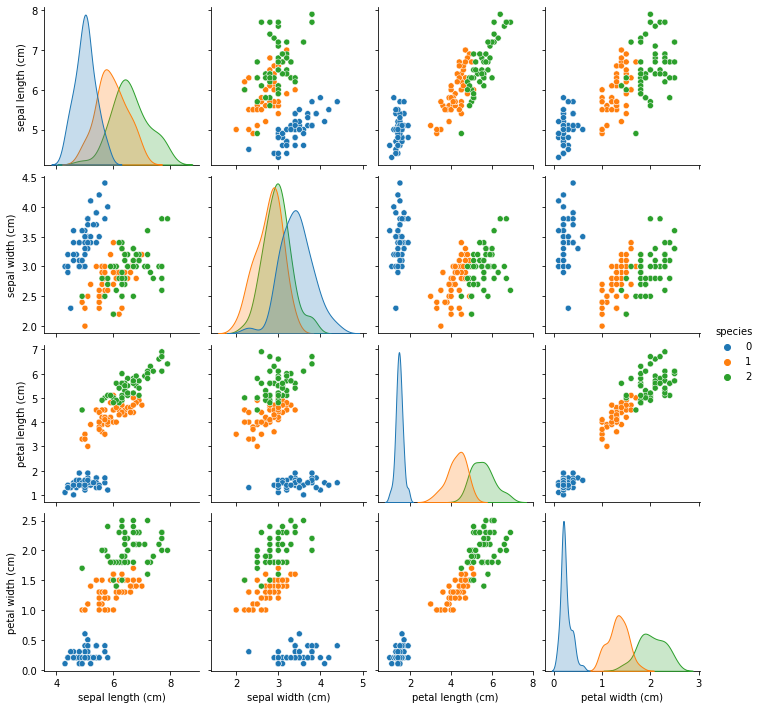

In [11]:
sns.pairplot(iris_df, hue='species',palette="tab10")

In [12]:
x = iris_df.drop("species", axis = 1)
y = iris_df["species"].astype("category")

In [13]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [14]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
98                 5.1               2.5                3.0               1.1
0                  5.1               3.5                1.4               0.2
26                 5.0               3.4                1.6               0.4
15                 5.7               4.4                1.5               0.4
87                 6.3               2.3                4.4               1.3
..                 ...               ...                ...               ...
94                 5.6               2.7                4.2               1.3
55                 5.7               2.8                4.5               1.3
114                5.8               2.8                5.1               2.4
64                 5.6               2.9                3.6               1.3
22                 4.6               3.6                1.0               0.2

[105 rows x 4 columns]


In [15]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
115                6.4               3.2                5.3               2.3
43                 5.0               3.5                1.6               0.6
100                6.3               3.3                6.0               2.5
50                 7.0               3.2                4.7               1.4
18                 5.7               3.8                1.7               0.3
134                6.1               2.6                5.6               1.4
42                 4.4               3.2                1.3               0.2
113                5.7               2.5                5.0               2.0
128                6.4               2.8                5.6               2.1
56                 6.3               3.3                4.7               1.6
126                6.2               2.8                4.8               1.8
84                 5.4               3.0                4.5     

In [16]:
print(Y_train)

98     1
0      0
26     0
15     0
87     1
      ..
94     1
55     1
114    2
64     1
22     0
Name: species, Length: 105, dtype: category
Categories (3, int64): [0, 1, 2]


In [17]:
print(Y_test)

115    2
43     0
100    2
50     1
18     0
134    2
42     0
113    2
128    2
56     1
126    2
84     1
119    2
88     1
31     0
27     0
30     0
135    2
69     1
61     1
136    2
91     1
29     0
45     0
16     0
123    2
53     1
9      0
60     1
148    2
52     1
2      0
127    2
36     0
89     1
92     1
145    2
149    2
58     1
80     1
4      0
48     0
102    2
21     0
28     0
Name: species, dtype: category
Categories (3, int64): [0, 1, 2]


In [18]:
logistic_model = LogisticRegression(max_iter = 200).fit(X_train,Y_train)

prediction = logistic_model.predict(X_test)
print("Logistic Regression Accuracy = ",accuracy_score(prediction,Y_test))

Logistic Regression Accuracy =  0.9555555555555556


In [19]:
k_nearest_neighbors_model = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",k_nearest_neighbors_model.best_params_)
print("K-Nearest Neighbors Accuracy = ",k_nearest_neighbors_model.best_score_)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 4}
K-Nearest Neighbors Accuracy =  0.9619047619047618


In [20]:
support_vector_machine_model = svm.SVC().fit(X_train,Y_train)
prediction = support_vector_machine_model.predict(X_test)
print("Support Vector Machine Accuracy = ",accuracy_score(prediction,Y_test))

Support Vector Machine Accuracy =  0.9555555555555556


In [21]:
decision_tree_model = DecisionTreeClassifier().fit(X_train,Y_train)
prediction = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy = ",accuracy_score(prediction,Y_test))

Decision Tree Accuracy =  0.9555555555555556


In [22]:
prediction_knn_df = pd.DataFrame(k_nearest_neighbors_model.predict(x),columns=["prediction"])
prediction_iris_df = pd.DataFrame(concat([iris_df,prediction_knn_df],axis=1))

In [23]:
print(prediction_iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  prediction  


In [24]:
sepal_x = iris_df[["sepal length (cm)","sepal width (cm)"]]
sepal_y = iris_df[["species"]]

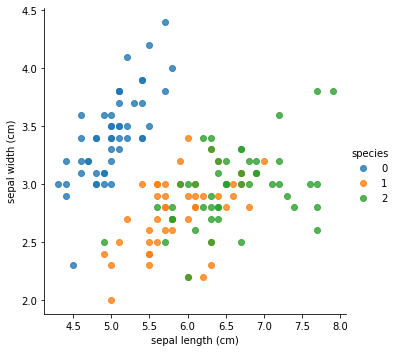

In [25]:
sns.lmplot(x="sepal length (cm)",y="sepal width (cm)",fit_reg = False,hue="species",data = iris_df)

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(sepal_x,sepal_y,test_size=0.3)

In [27]:
print(X_train)

     sepal length (cm)  sepal width (cm)
33                 5.5               4.2
90                 5.5               2.6
106                4.9               2.5
140                6.7               3.1
91                 6.1               3.0
..                 ...               ...
8                  4.4               2.9
17                 5.1               3.5
3                  4.6               3.1
148                6.2               3.4
37                 4.9               3.6

[105 rows x 2 columns]


In [28]:
print(X_test)

     sepal length (cm)  sepal width (cm)
6                  4.6               3.4
131                7.9               3.8
74                 6.4               2.9
103                6.3               2.9
70                 5.9               3.2
60                 5.0               2.0
64                 5.6               2.9
56                 6.3               3.3
31                 5.4               3.4
66                 5.6               3.0
69                 5.6               2.5
112                6.8               3.0
54                 6.5               2.8
109                7.2               3.6
45                 4.8               3.0
87                 6.3               2.3
121                5.6               2.8
12                 4.8               3.0
115                6.4               3.2
98                 5.1               2.5
119                6.0               2.2
114                5.8               2.8
96                 5.7               2.9
78              

In [29]:
print(Y_train)

     species
33         0
90         1
106        2
140        2
91         1
..       ...
8          0
17         0
3          0
148        2
37         0

[105 rows x 1 columns]


In [30]:
print(Y_test)

     species
6          0
131        2
74         1
103        2
70         1
60         1
64         1
56         1
31         0
66         1
69         1
112        2
54         1
109        2
45         0
87         1
121        2
12         0
115        2
98         1
119        2
114        2
96         1
78         1
68         1
50         1
82         1
18         0
38         0
63         1
43         0
100        2
58         1
137        2
44         0
86         1
118        2
133        2
104        2
36         0
77         1
41         0
94         1
67         1
110        2


In [31]:
logistic_model = LogisticRegression().fit(X_train,Y_train.values.ravel())

prediction = logistic_model.predict(X_test)
print("Logistic Regression Accuracy = ",accuracy_score(prediction,Y_test))

Logistic Regression Accuracy =  0.7111111111111111


In [32]:
k_nearest_neighbors_model = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",k_nearest_neighbors_model.best_params_)
print("K-Nearest Neighbors Accuracy = ",k_nearest_neighbors_model.best_score_)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 9}
K-Nearest Neighbors Accuracy =  0.8380952380952381


In [33]:
support_vector_machine_model = svm.SVC().fit(X_train,Y_train.values.ravel())
prediction = support_vector_machine_model.predict(X_test)
print("Support Vector Machine Accuracy = ",accuracy_score(prediction,Y_test))

Support Vector Machine Accuracy =  0.7555555555555555


In [34]:
decision_tree = DecisionTreeClassifier().fit(X_train,Y_train)
prediction = decision_tree.predict(X_test)
print("Decision Tree Accuracy = ",accuracy_score(prediction,Y_test))

Decision Tree Accuracy =  0.6888888888888889


In [35]:
petal_x = iris_df[["petal length (cm)","petal width (cm)"]]
petal_y = iris_df[["species"]]

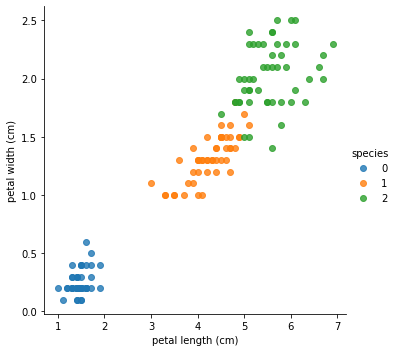

In [36]:
sns.lmplot(x="petal length (cm)",y="petal width (cm)",fit_reg = False,hue="species",data = iris_df)

In [37]:
X_train,X_test,Y_train,Y_test = train_test_split(petal_x,petal_y,test_size=0.3)

In [38]:
print(X_train)

     petal length (cm)  petal width (cm)
44                 1.9               0.4
78                 4.5               1.5
96                 4.2               1.3
136                5.6               2.4
62                 4.0               1.0
..                 ...               ...
108                5.8               1.8
138                4.8               1.8
36                 1.3               0.2
21                 1.5               0.4
48                 1.5               0.2

[105 rows x 2 columns]


In [39]:
print(X_test)

     petal length (cm)  petal width (cm)
135                6.1               2.3
53                 4.0               1.3
128                5.6               2.1
122                6.7               2.0
46                 1.6               0.2
57                 3.3               1.0
142                5.1               1.9
86                 4.7               1.5
148                5.4               2.3
73                 4.7               1.2
66                 4.5               1.5
54                 4.6               1.5
1                  1.4               0.2
90                 4.4               1.2
146                5.0               1.9
140                5.6               2.4
111                5.3               1.9
16                 1.3               0.4
129                5.8               1.6
126                4.8               1.8
4                  1.4               0.2
24                 1.9               0.2
27                 1.5               0.2
149             

In [40]:
print(Y_train)

     species
44         0
78         1
96         1
136        2
62         1
..       ...
108        2
138        2
36         0
21         0
48         0

[105 rows x 1 columns]


In [41]:
print(Y_test)

     species
135        2
53         1
128        2
122        2
46         0
57         1
142        2
86         1
148        2
73         1
66         1
54         1
1          0
90         1
146        2
140        2
111        2
16         0
129        2
126        2
4          0
24         0
27         0
149        2
125        2
9          0
133        2
45         0
145        2
116        2
41         0
124        2
52         1
74         1
117        2
91         1
59         1
83         1
63         1
80         1
123        2
134        2
127        2
89         1
141        2


In [42]:
logistic_model = LogisticRegression().fit(X_train,Y_train.values.ravel())

prediction = logistic_model.predict(X_test)
print("Logistic Regression Accuracy = ",accuracy_score(prediction,Y_test))

Logistic Regression Accuracy =  0.9333333333333333


In [43]:
k_nearest_neighbors_model = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",k_nearest_neighbors_model.best_params_)
print("K-Nearest Neighbors Accuracy = ",k_nearest_neighbors_model.best_score_)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 4}
K-Nearest Neighbors Accuracy =  0.9714285714285713


In [44]:
support_vector_machine_model = svm.SVC().fit(X_train,Y_train.values.ravel())
prediction = support_vector_machine_model.predict(X_test)
print("Support Vector Machine Accuracy = ",accuracy_score(prediction,Y_test))

Support Vector Machine Accuracy =  0.8888888888888888


In [45]:
decision_tree = DecisionTreeClassifier().fit(X_train,Y_train)
prediction = decision_tree.predict(X_test)
print("Decision Tree Accuracy = ",accuracy_score(prediction,Y_test))

Decision Tree Accuracy =  0.8888888888888888


In [46]:
prediction_petal_logistic_df = pd.DataFrame(logistic_model.predict(petal_x),columns=["prediction"])
prediction_iris_df = pd.DataFrame(concat([iris_df,prediction_petal_logistic_df],axis=1))

In [47]:
print(prediction_iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  prediction  
